# Yaswanth pulavarthi 20bci7331


In [1]:
#loading
import numpy as np
import rasterio as rio
from rasterio.plot import show
import matplotlib.pyplot as plt

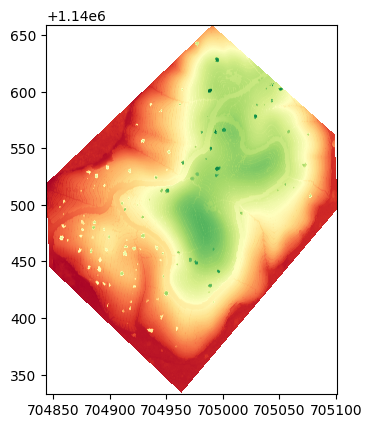

<Axes: >

In [5]:
dem = rio.open("DataFiles/DSM/SURINOVA_CBE_DSM.tif")
dem_array = dem.read(1).astype('float64')
show(dem,cmap='RdYlGn')

In [6]:
type(dem)

rasterio.io.DatasetReader

In [7]:
dtm = rio.open("DataFiles/DTM/SURINOVA_CBE_DTM.tif")
dtm_array = dem.read(1).astype('float64')

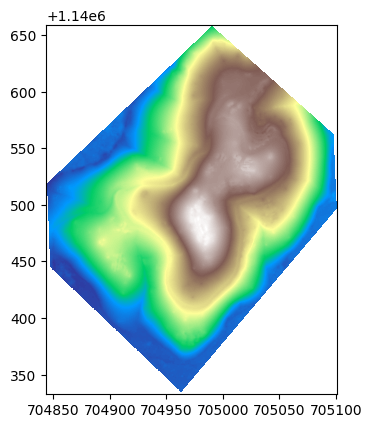

<Axes: >

In [8]:
show(dtm,cmap='terrain')

# Orthomosaic

In [9]:
from rasterio.windows import Window

with rio.open("DataFiles/Orthomosaic/SURINOVA_CBE_ORTHO.tif") as Orthomosaic:
    data1 = Orthomosaic.read(window=Window(3200, 6000, 1400, 2000))
    #show(Orthomosaic)
    #show(data1)
    rpcs = Orthomosaic.crs.to_wkt()

#Orthomosaic_array = Orthomosaic.read(1).astype('float64')

In [10]:
print(rpcs)

PROJCS["WGS 84 / UTM zone 43N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",75],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32643"]]


In [11]:
Orthomosaic.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': 256.0,
 'width': 12089,
 'height': 15348,
 'count': 4,
 'crs': CRS.from_epsg(32643),
 'transform': Affine(0.021298759585604753, 0.0, 704843.7145236488,
        0.0, -0.021298759585600333, 1140659.4478733968)}

In [12]:
Orthomosaic.xy(3200, 6000)


(704971.5177305422, 1140591.281193343)

In [13]:
Orthomosaic.xy(1200, 6000)


(704971.5177305422, 1140633.8787125142)

OUR DATA GEOTIFF BELONGS TO THIS LOCATION
# Valparai 642125, Tamil Nadu
# Valparai Tamil Nadu India
# near sholayar dam

In [14]:
import pyproj
print(pyproj.__version__)  # 2.4.1
print(pyproj.proj_version_str) # 6.2.1

proj = pyproj.Transformer.from_crs(32643, 4326, always_xy=True)

x, y = Orthomosaic.xy(3200, 6000)
x1, y1 = proj.transform(x, y)
x, y = Orthomosaic.xy(3200, 6001)
x2, y2 = proj.transform(x, y)
print((x1,y1))
print((x2, y2))  # longitudes and latitudes
#Valparai 642125, Tamil Nadu
#Valparai Tamil Nadu India
#near sholayar dam

3.6.1
9.3.0
(76.87175882777616, 10.312751734364703)
(76.87175902220031, 10.31275173323831)


In [15]:
import math
def get_north(lat1, long1, lat2, long2):
    dLon = (long2 - long1)

    y = math.sin(dLon) * math.cos(lat2)
    x = math.cos(lat1) * math.sin(lat2) - math.sin(lat1) * math.cos(lat2) * math.cos(dLon)

    brng = math.atan2(y, x)

    brng = np.rad2deg(brng)

    return brng
print(get_north(y1,x1, y2, x2))

-90.52605055567382


# minus 90 deg means geotiff is already north up 

In [16]:
from rasterio.plot import reshape_as_raster, reshape_as_image
image = reshape_as_image(data1)
#print(image)
print(image.shape)

image = np.delete(image, 3, axis=2)
# Sample Image of scikit-image package

(2000, 1400, 4)


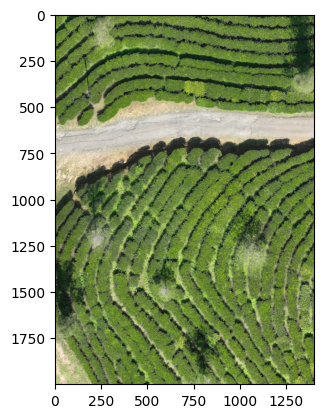

In [17]:
plt.imshow(image)

# GRAYSCALE IMAGE

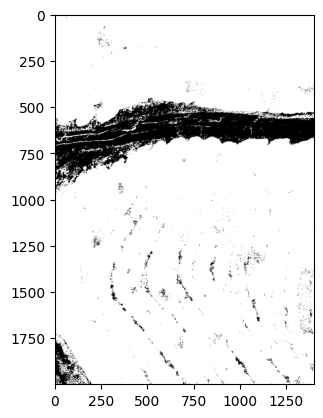

In [18]:
import cv2
# Load the image
#img = cv2.imread(image)
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#plt.imshow(img)
# Blurring for removing the noise 
#img_blur = cv2.bilateralFilter(image, d = 7, 
#                               sigmaSpace = 75, sigmaColor =75)
# Convert to grayscale 
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Apply the thresholding
a = img_gray.max()  
#thresh = np.invert(thresh)
_, thresh = cv2.threshold(img_gray, a/2+60, a,cv2.THRESH_BINARY_INV)
#thresh = np.invert(thresh)
plt.imshow(thresh, cmap = 'gray')

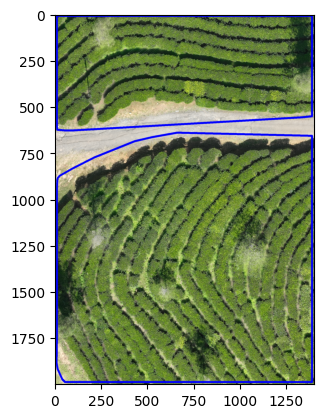

In [19]:
# Find the contour of the figure 
thresh = thresh.astype(np.uint8)
contours_blue, hierarchy = cv2.findContours(
                                   image = thresh, 
                                   mode = cv2.RETR_EXTERNAL, 
                                   method = cv2.CHAIN_APPROX_NONE)

# Sort the contours 
contours_blue = sorted(contours_blue, key = cv2.contourArea, reverse = True)
# Draw the contour 
img_copy = image.copy()

#c_0 = contours[0]
#rect = cv2.minAreaRect(contours[0])
#box = cv2.boxPoints(rect)
#box = np.int0(box)
#print(c_0)
hull1 = cv2.convexHull(contours_blue[0])
hull2 = cv2.convexHull(contours_blue[1])
#rect = cv2.minAreaRect(c_0)
#box = cv2.boxPoints(rect)
#box = box.astype('int')
boxes_hull_blue = [hull1, hull2]
#final = cv2.drawContours(image.copy(),contours ,contourIdx =-3,
#                         color = (255, 0, 0), thickness = 2)

#gray = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY) 

#thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
#coords = np.column_stack(np.where(thresh > 0))

#c2=np.stack((coords[:,1], coords[:,0]), axis=-1)


final = cv2.polylines(image.copy(), [abs(hull1-10),abs(hull2-10)] , True,color = (0, 0, 255), thickness = 10)
plt.imshow(final)

#plt.xscale(.9)

In [20]:
area_blue = 0
for x in contours_blue:
    area_blue = area_blue + cv2.contourArea(x)
area_blue

2533418.0

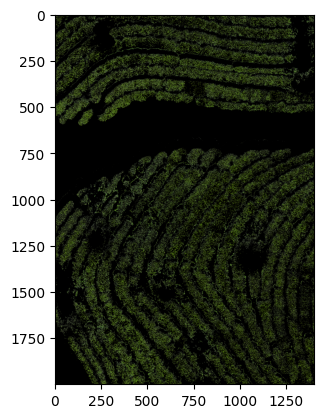

In [21]:
#green = np.uint8([[[0, 255, 0]]]) # Here insert the BGR values which you want to convert to HSV
#hsvGreen = cv2.cvtColor(green, cv2.COLOR_BGR2HSV)
#print(hsvGreen)

#lowerLimit = hsvGreen[0][0][0] - 10, 100, 100
#upperLimit = hsvGreen[0][0][0] + 10, 255, 255

lowerLimit = np.array([0, 100, 0], dtype = "uint8")
upperLimit= np.array([100, 255, 255], dtype = "uint8")
mask = cv2.inRange(image.copy(), lowerLimit, upperLimit)

detected_output = cv2.bitwise_and(image.copy(), image.copy(), mask = mask)

plt.imshow( detected_output , cmap = 'gray')
#import PIL  

#from PIL import Image
#im = Image.fromarray(detected_output)
#im.save("your_file.jpeg")

#print(image)

125


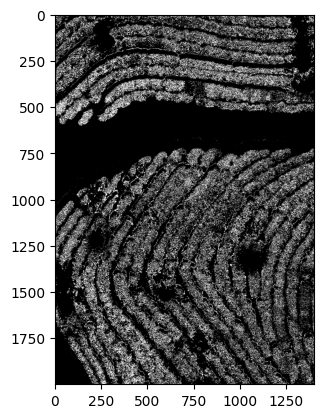

In [22]:
import cv2
# Load the image
#img = cv2.imread(image)
img = cv2.cvtColor(detected_output, cv2.COLOR_BGR2RGB)
#plt.imshow(img)
# Blurring for removing the noise 
#img_blur = cv2.bilateralFilter(image, d = 7, 
#                               sigmaSpace = 75, sigmaColor =75)
# Convert to grayscale 
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Apply the thresholding
a = img_gray.max()
print(a)
thresh = np.invert(thresh)
_, thresh2 = cv2.threshold(img_gray, 0, 2*a,cv2.THRESH_BINARY)
#thresh = np.invert(thresh)
plt.imshow(thresh2, cmap = 'gray')

# My previous version, didn't solve the concavity problem in contours
## the below code is helps to solve this.
https://gist.github.com/AndreLester/589ea1eddd3a28d00f3d7e47bd9f28fb

In [23]:
import bisect
from collections import OrderedDict
import math
#import numpy as np
import matplotlib.tri as tri
from shapely.geometry import LineString
from shapely.geometry import Polygon
from shapely.ops import linemerge


class ConcaveHull:
    
    def __init__(self):
        self.triangles = {}
        self.crs = {}
        
    
    def loadpoints(self, points):
        #self.points = np.array(points)
        self.points = points
        
        
    def edge(self, key, triangle):
        '''Calculate the length of the triangle's outside edge
        and returns the [length, key]'''
        pos = triangle[1].index(-1)
        if pos==0:
            x1, y1 = self.points[triangle[0][0]]
            x2, y2 = self.points[triangle[0][1]]
        elif pos==1:
            x1, y1 = self.points[triangle[0][1]]
            x2, y2 = self.points[triangle[0][2]]
        elif pos==2:
            x1, y1 = self.points[triangle[0][0]]
            x2, y2 = self.points[triangle[0][2]]
        length = ((x1-x2)**2+(y1-y2)**2)**0.5
        rec = [length, key]
        return rec
        
    
    def triangulate(self):
        
        if len(self.points) < 2:
            raise Exception('CountError: You need at least 3 points to Triangulate')
        
        temp = list(zip(*self.points))
        x, y = list(temp[0]), list(temp[1])
        del(temp)
        
        triang = tri.Triangulation(x, y)
        
        self.triangles = {}
        
        for i, triangle in enumerate(triang.triangles):
            self.triangles[i] = [list(triangle), list(triang.neighbors[i])]
        

    def calculatehull(self, tol=50):
        
        self.tol = tol
        
        if len(self.triangles) == 0:
            self.triangulate()
        
        # All triangles with one boundary longer than the tolerance (self.tol)
        # is added to a sorted deletion list.
        # The list is kept sorted from according to the boundary edge's length
        # using bisect        
        deletion = []    
        self.boundary_vertices = set()
        for i, triangle in self.triangles.items():
            if -1 in triangle[1]:
                for pos, neigh in enumerate(triangle[1]):
                    if neigh == -1:
                        if pos == 0:
                            self.boundary_vertices.add(triangle[0][0])
                            self.boundary_vertices.add(triangle[0][1])
                        elif pos == 1:
                            self.boundary_vertices.add(triangle[0][1])
                            self.boundary_vertices.add(triangle[0][2])
                        elif pos == 2:
                            self.boundary_vertices.add(triangle[0][0])
                            self.boundary_vertices.add(triangle[0][2])
            if -1 in triangle[1] and triangle[1].count(-1) == 1:
                rec = self.edge(i, triangle)
                if rec[0] > self.tol and triangle[1].count(-1) == 1:
                    bisect.insort(deletion, rec)
                    
        while len(deletion) != 0:
            # The triangles with the longest boundary edges will be 
            # deleted first
            item = deletion.pop()
            ref = item[1]
            flag = 0
            
            # Triangle will not be deleted if it already has two boundary edges            
            if self.triangles[ref][1].count(-1) > 1:
                continue
                
            # Triangle will not be deleted if the inside node which is not
            # on this triangle's boundary is already on the boundary of 
            # another triangle
            adjust = {0: 2, 1: 0, 2: 1}            
            for i, neigh in enumerate(self.triangles[ref][1]):
                j = adjust[i]
                if neigh == -1 and self.triangles[ref][0][j] in self.boundary_vertices:
                    flag = 1
                    break
            if flag == 1:
                continue
           
            for i, neigh in enumerate(self.triangles[ref][1]):
                if neigh == -1:
                    continue
                pos = self.triangles[neigh][1].index(ref)
                self.triangles[neigh][1][pos] = -1
                rec = self.edge(neigh, self.triangles[neigh])
                if rec[0] > self.tol and self.triangles[rec[1]][1].count(-1) == 1:
                    bisect.insort(deletion, rec)
                    
            for pt in self.triangles[ref][0]:
                self.boundary_vertices.add(pt)
                                        
            del self.triangles[ref]
            
        self.polygon()
            
                    

    def polygon(self):
        
        edgelines = []
        for i, triangle in self.triangles.items():
            if -1 in triangle[1]:
                for pos, value in enumerate(triangle[1]):
                    if value == -1:
                        if pos==0:
                            x1, y1 = self.points[triangle[0][0]]
                            x2, y2 = self.points[triangle[0][1]]
                        elif pos==1:
                            x1, y1 = self.points[triangle[0][1]]
                            x2, y2 = self.points[triangle[0][2]]
                        elif pos==2:
                            x1, y1 = self.points[triangle[0][0]]
                            x2, y2 = self.points[triangle[0][2]]
                        line = LineString([(x1, y1), (x2, y2)])
                        edgelines.append(line)

        bound = linemerge(edgelines)
    
        self.boundary = Polygon(bound.coords)

# YELLOW

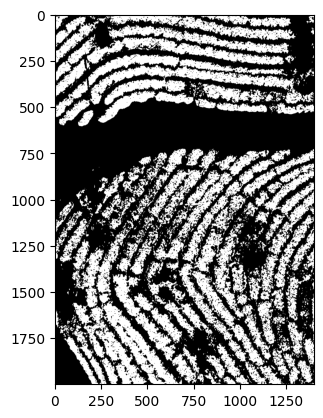

In [24]:
img_gray = cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_BGR2HSV)
#lowerLimit = np.array([1, 80, 1], dtype = "uint8")
lowerLimit = np.array([60, 85, 1], dtype = "uint8")
upperLimit= np.array([160, 190, 100], dtype = "uint8")
mask = cv2.inRange(image.copy(), lowerLimit, upperLimit)

detected_output = cv2.bitwise_and(image.copy(), image.copy(), mask = mask)
#mask = ~mask;
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))

done = False
#while( not done):
eroded = cv2.erode(mask,element,iterations = 3)
temp = cv2.dilate(eroded,(3,3),iterations = 4)
closing = cv2.morphologyEx(temp, cv2.MORPH_OPEN, (3,3))
#gradient = cv2.morphologyEx(closing, cv2.MORPH_GRADIENT ,(5,5))

plt.imshow(closing, "gray")


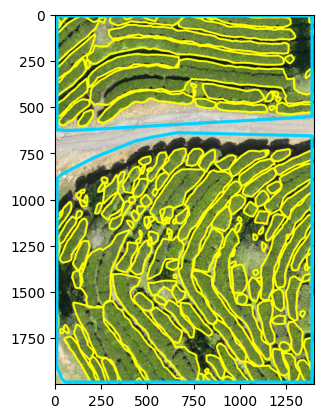

In [25]:
thresh2 = closing#thresh2.astype(np.uint8)
contours_red, hierarchy = cv2.findContours(
                                   image = thresh2, 
                                   mode = cv2.RETR_EXTERNAL, 
                                   method = cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours 
contours_yellow = sorted(contours_red, key = cv2.contourArea, reverse = True)
# Draw the contour 
img_copy = image.copy()
boxes = []
area_yellow = 0
for c in contours_yellow[0:170]:
    area_yellow= area_yellow+cv2.contourArea(c)
    ch = ConcaveHull()
    ch.loadpoints(c.reshape(-1,2))
    ch.calculatehull()
    boundary_points = np.vstack(ch.boundary.exterior.coords.xy).T
    #rect = cv2.minAreaRect(c)
    #box = cv2.boxPoints(rect)
    #box = box.astype('int')
    #box = cv2.convexHull(c)
    ##epsilon = 0.01*cv2.arcLength(c,True)
    #box = cv2.approxPolyDP(c,epsilon,True)
    boxes.append(boundary_points.reshape(-1,1,2).astype(np.int32))
#inal = cv2.drawContours(image.copy(),contours ,contourIdx =-3,
#                        color = (255,255,0), thickness = 3)
final = cv2.drawContours(image.copy(),contours = boxes,contourIdx =-3,
                         color = (255, 255, 0), thickness = 10)
#final = cv2.polylines(image.copy(), contours , False,color = (255,255,153), thickness = 2)
final_yellow = cv2.polylines(final, [abs(boxes_hull_blue[0]-10),abs(boxes_hull_blue[1]-10)] , True,color = (0, 210, 255), thickness = 15)
plt.imshow(final_yellow)

#plt.figure(figsize=(100,200))

In [26]:
area_yellow

1132622.5

# RED

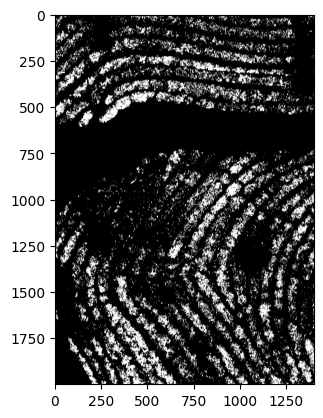

In [27]:
img_gray = cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_BGR2HSV)
#lowerLimit = np.array([1, 80, 1], dtype = "uint8")
lowerLimit = np.array([60, 85, 1], dtype = "uint8")
upperLimit= np.array([160, 190,50], dtype = "uint8")
mask = cv2.inRange(image.copy(), lowerLimit, upperLimit)

detected_output = cv2.bitwise_and(image.copy(), image.copy(), mask = mask)
#mask = ~mask;
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))

done = False
#while( not done):
eroded = cv2.erode(mask,element,iterations = 1)
temp = cv2.dilate(eroded,(3,3),iterations = 6)
closing = cv2.morphologyEx(temp, cv2.MORPH_OPEN, (3,3))
#gradient = cv2.morphologyEx(closing, cv2.MORPH_GRADIENT ,(5,5))

plt.imshow(closing, "gray")


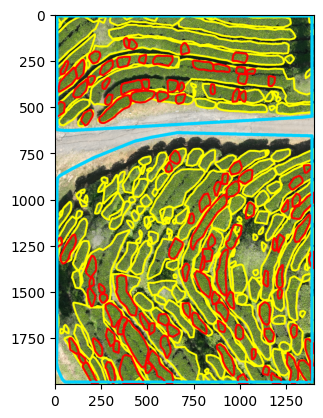

In [28]:
thresh_gray = closing
#thresh_gray = ~thresh_gray
#plt.imshow(thresh_gray)

contours_red, _ = cv2.findContours(
                                   image = thresh_gray, 
                                   mode = cv2.RETR_EXTERNAL, 
                                   method = cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours 
contours_red = sorted(contours_red, key = cv2.contourArea, reverse = True)
# Draw the contour 
img_copy = image.copy()
boxes1 = []
area_red = 0
for c in contours_red[:110]:
    area_red= area_red+cv2.contourArea(c)
    ch = ConcaveHull()
    pts = np.random.uniform(size=(100, 2))
    ch.loadpoints(c.reshape(-1,2))
    ch.calculatehull()
    boundary_points = np.vstack(ch.boundary.exterior.coords.xy).T
    box = cv2.convexHull(c)
    #epsilon = 0.*cv2.arcLength(c,True)
    #approx = cv2.approxPolyDP(c,epsilon,True)
    boxes1.append(boundary_points.reshape(-1,1,2).astype(np.int32))
final = cv2.drawContours(final_yellow,contours = boxes1 ,contourIdx =-3,
                         color = (255, 0, 0), thickness = 10)

#final = cv2.polylines(image.copy(), contours , False,color = (255,255,153), thickness = 2)
final_yellow = cv2.polylines(final, [abs(boxes_hull_blue[0]-10),abs(boxes_hull_blue[1]-10)] , True,color = (0, 210, 255), thickness = 10)
#plt.imshow(final2)

#plt.figure(figsize=(100,200))
plt.imshow(final_yellow)



In [29]:
area_red

205666.5

#
# final
#


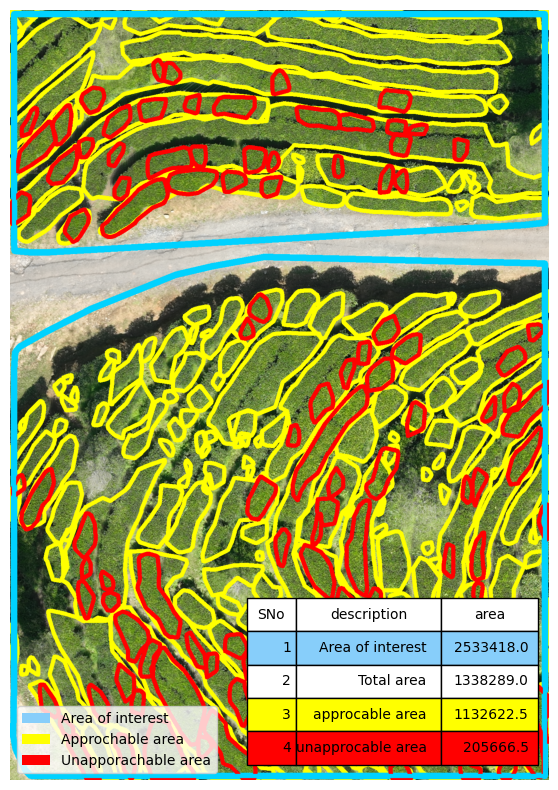

In [40]:

plt.figure(figsize=(7,10))

plt.hist([[area_blue], [area_red], [area_yellow]], color=["lightskyblue","yellow","red"], stacked=True, 
             label=['Area of interest','Approchable area','Unapporachable area'])


#defining the attributes
col_labels = ['SNo','description','area']
#row_labels = ['Row1','Row2','Row3']
table_vals = [[1, "Area of interest", area_blue], [2, "Total area", area_yellow+area_red], [3, "approcable area", area_yellow], [4, "unapprocable area", area_red]]
row_colors = [['lightskyblue', 'lightskyblue','lightskyblue'],['white', 'white','white'],['yellow', 'yellow','yellow'], ['red', 'red','red']]
#plotting
plt.axis('off')
plt.legend(loc="lower left")
plt.imshow(final_yellow, aspect='equal')
im = plt.imread('north.jpeg')
#plt.rcParams["figure.figsize"] = (2,3)



table = plt.table(cellText=table_vals,
                     colLabels=col_labels, colWidths=[0.1, .3, .2],
                     cellColours=row_colors,
                     loc='lower right')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(.9,2)
fig = plt.gcf() 
  
plt.savefig('figure.png', bbox_inches='tight')

  

(-0.5, 557.5, 789.5, -0.5)

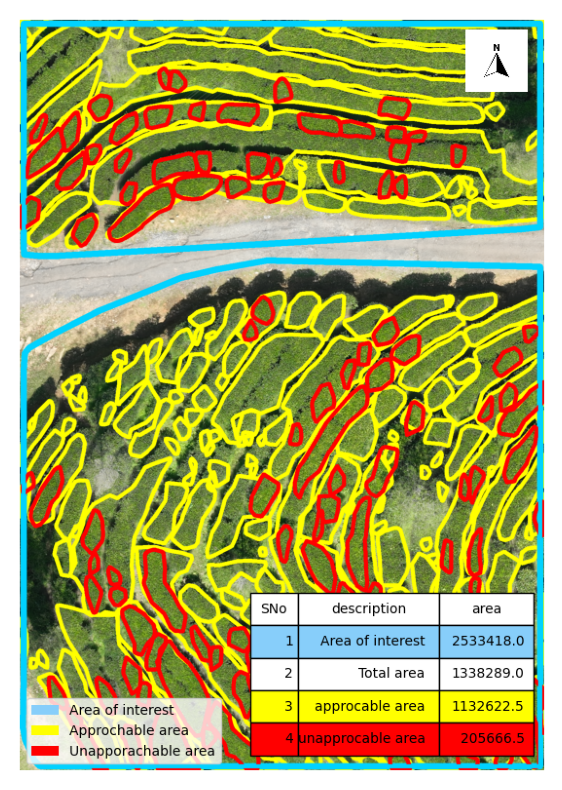

In [46]:
from PIL import Image
img = plt.imread('north.jpeg')
img = img.astype(np.uint8)

img = cv2.resize(img, (64, 64))
img = Image.fromarray(img)

img_w, img_h = img.size
background = Image.open('figure.png', 'r')
bg_w, bg_h = background.size
offset = (bg_w-90, 20)
background.paste(img, offset)
plt.figure(figsize=(7,10))
plt.imshow(background, aspect='auto')
plt.axis("off")

In [42]:
import shapefile

def saving_shp(contours, filename):
    w = shapefile.Writer(filename, shapeType=shapefile.POLYLINE)
    # Check if any contours were extracted
    w.field('ID', 'N')
    if len(contours) == 0:
        print("No contours were extracted from the image")
        exit()

    for i, cnt in enumerate(contours):
        cnt = cnt.reshape(1, -1, 2)
        w.line(cnt.tolist())
        w.record(i)

    # Save the shapefile
    w.close()

In [43]:
saving_shp(boxes_hull_blue,"contours_blue" )
saving_shp(boxes,"contours_yellow" )
saving_shp(boxes1,"contours_red" )